In [9]:
import pandas as pd
import numpy as np
import os
import shutil
import statistics
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.backends.backend_pdf import PdfPages
import movieslib as mov
import seaborn as sns
import copy
import random

#import importlib
#importlib.reload(movieslib)

In [ ]:
#it's an important cell, but don't touch it, because it should be done before splitting data into shots
#for the experimental setting it's done already

'''

df_raw = pd.read_csv("./12movies_init_FaceReader_output/Zvezda.csv", delimiter=',')

for au in cols:
    au_i = df_raw[au]
    au_f = savgol_filter(au_i, 5, 3)
    au_f = savgol_filter(au_f, 9, 3)
    au_f = savgol_filter(au_f, 19, 3)

    for i in range(len(au_f)):
        if au_f[i] < 0:
            au_f[i] = 0

    plt.plot(au_f[200:300], color='red', alpha=0.5)

    au_filtered = au + '_filtered'
    df_raw[au_filtered] = au_f



pd.DataFrame.from_dict(df_raw).to_csv(f'./12movies_selected_frames/EXPERIMENT_filtered_star.csv', sep=',', mode='w')

'''

In [2]:
FOLDER_RAW = './12movies_init_FaceReader_output/'
FOLDER_INPUT = './12movies_cuts/'
FOLDER_OUTPUT = './statistics_universal_formula'
NORMALISE = False
FILTERING = False #(it takes very long)
VALUE = 'avg' #(sum/max of AUs)

df = pd.read_csv("./12movies_cuts/BrightStarAM.csv", delimiter=',')
#df_raw = pd.read_csv("./12movies_init_FaceReader_output/Zvezda.csv", delimiter=',')
start = 0
df[start:start+10]
#df_raw[start:start+10]

,Unnamed: 0,frame,face_id,timestamp,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,0,3009,0.0,125.459,0.0,0.0,0.0,0.0,0.70,0.72,...,0.63,0.0,0.00,1.10,1.98,1.45,0.00,0.0,0.26,0.0
1,1,3010,0.0,125.501,0.0,0.0,0.0,0.0,0.33,1.47,...,0.18,0.0,0.00,0.71,1.25,0.50,0.32,0.0,0.00,0.0
2,2,3011,0.0,125.542,0.0,0.0,0.0,0.0,0.26,1.23,...,0.00,0.0,0.00,0.58,0.33,0.71,0.00,0.0,0.00,0.0
3,3,3012,0.0,125.584,0.0,0.0,0.0,0.0,0.35,1.07,...,0.00,0.0,0.00,0.43,1.47,0.78,0.42,0.0,0.00,0.0
4,4,3013,0.0,125.626,0.0,0.0,0.0,0.0,0.05,0.85,...,0.00,0.0,0.00,0.57,1.37,0.34,0.17,0.0,0.00,0.0
5,5,3014,0.0,125.667,0.0,0.0,0.0,0.0,0.03,1.16,...,0.00,0.0,0.00,0.68,1.17,0.42,0.00,0.0,0.00,0.0
6,6,3015,0.0,125.709,0.0,0.0,0.0,0.0,0.18,1.14,...,0.00,0.0,0.00,0.76,1.23,0.47,0.00,0.0,0.00,0.0
7,7,3016,0.0,125.751,0.0,0.0,0.0,0.0,0.16,1.56,...,0.00,0.0,0.00,0.91,1.71,0.52,0.00,0.0,0.00,0.0
8,8,3017,0.0,125.792,0.0,0.0,0.0,0.0,0.14,1.42,...,0.00,0.0,0.00,0.86,1.28,0.37,0.00,0.0,0.00,0.0
9,9,3018,0.0,125.834,0.0,0.0,0.0,0.0,0.00,1.28,...,0.00,0.0,0.64,0.98,0.74,0.00,0.00,0.0,0.00,0.0


In [20]:
cols = ['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r']

In [4]:
df_exp = pd.read_csv("./12movies_selected_frames/suitable_frames_EXP_star.csv", delimiter=',')

In [5]:
df_exp

,Unnamed: 0.1,Unnamed: 0,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,...,AU07_r_filtered,AU09_r_filtered,AU12_r_filtered,AU14_r_filtered,AU15_r_filtered,AU17_r_filtered,AU20_r_filtered,AU23_r_filtered,AU25_r_filtered,AU26_r_filtered
0,33,33,3009,0,125.459,0.98,1,-0.003950,0.092122,-0.995740,...,0.480075,0.184220,0.604297,0.000000,0.776892,0.729032,0.783020,0.102766,0.081780,0.030933
1,35,35,3010,0,125.501,0.98,1,0.004156,0.134233,-0.990941,...,0.765117,0.374129,0.317036,0.000000,0.823042,0.990971,0.818965,0.115866,0.011722,0.028633
2,36,36,3011,0,125.542,0.98,1,0.000140,0.162016,-0.986788,...,0.909999,0.450543,0.184800,0.000000,0.812511,1.100951,0.782290,0.114131,0.000000,0.025759
3,37,37,3012,0,125.584,0.98,1,-0.005340,0.170737,-0.985302,...,1.038814,0.512688,0.082107,0.008630,0.782886,1.177732,0.710272,0.108035,0.000000,0.021941
4,38,38,3013,0,125.626,0.98,1,-0.000795,0.183702,-0.982982,...,1.137923,0.562931,0.016125,0.044225,0.750465,1.202466,0.611142,0.099382,0.000000,0.015894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41615,121082,121082,163406,265,6815.357,0.98,1,0.033238,0.138353,-0.989825,...,0.070613,0.887330,0.000123,0.150282,0.867809,0.722204,0.278403,0.218489,0.000000,0.201347
41616,121083,121083,163407,265,6815.399,0.98,1,0.027636,0.137791,-0.990076,...,0.083839,0.755526,0.000000,0.178584,0.908304,0.835460,0.381446,0.262095,0.000000,0.259192
41617,121084,121084,163408,265,6815.440,0.98,1,0.024149,0.136660,-0.990324,...,0.093979,0.619335,0.000000,0.197359,0.937867,0.902990,0.502543,0.291214,0.000000,0.309557
41618,121085,121085,163409,265,6815.482,0.98,1,-0.006095,0.114352,-0.993422,...,0.098929,0.483554,0.000000,0.207745,0.957250,0.922539,0.627981,0.305349,0.000000,0.341466


In [6]:
shots = list(df_exp.face_id.unique())
len(shots)

266

In [12]:
shots = random.sample(range(0, 255), 20)

In [ ]:
#plot graphs of all AUs in all files and save in a pdf format (one figure == all AUs of one file)
pdf = PdfPages("AU_filtering_experiments_before-after_splitting.pdf") #filename
count = 0

id = 0
deg = 3

for au in cols:

    for id in shots:

        # set figure
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
        fig.suptitle(str(au) + 'face_id = ' + str(id)) #figure title

        au_i = list(df[df['face_id'] == id][au])
        au_filt = au + '_filtered'
        au_experimental = list(df_exp[df_exp['face_id'] == id][au_filt])

        if len(au_i) != len(au_experimental):
            continue

        #au_i = df[au]
        window = 'original'
        ax[0].plot(au_i, color='blue', alpha=0.5)
        ax[0].set_title('window_size=' + str(window))

        window = 5
        au_i = savgol_filter(au_i, window, deg)
        window = 9
        au_i = savgol_filter(au_i, window, deg)
        window = 19
        au_i = savgol_filter(au_i, window, deg)
        ax[1].plot(au_i, color='blue', alpha=0.5)
        ax[1].set_title('filtered_after_splitting')

        ax[2].plot(au_experimental, color='blue', alpha=0.5)
        ax[2].set_title('filtered_before_splitting')


        plt.tight_layout()
        plt.show()

        #save plot
        #pdf.savefig(fig)

pdf.close()

In [14]:
id = 165

au_i = list(df[df['face_id'] == id]['AU01_r'])
len(au_i)


82

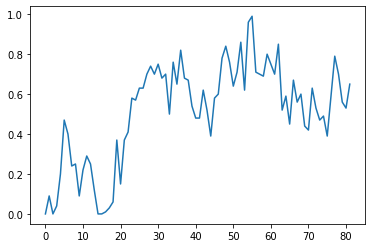

In [15]:
plt.plot(au_i)

In [16]:
au_experimental = list(df_exp[df_exp['face_id'] == id]['AU01_r_filtered'])
len(au_experimental)

82

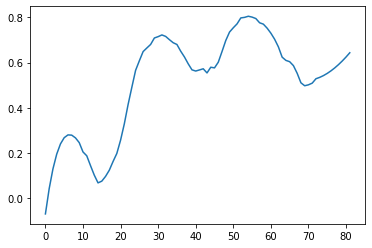

In [19]:
plt.plot(savgol_filter(au_i, 19, 3))